In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.constants import c
from scipy.optimize import curve_fit

#%matplotlib qt

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
f_carrier = 2216499354.5864286 

In [3]:
data = np.fromfile('/media/scott/fast/data/20221121/art1_20221121.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]
amp_data = data[:,2]


In [4]:
gmd_file = '/home/scott/code/GMAT/R2020a/output/Artemis1_Doppler_postlunar1.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

In [5]:
f_gmat = f_carrier * (1 - 1e3*gmd_rangerate/c)


rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c)

Rr = (c * ((freq_data / f_carrier) -1))/-1000

freq_diff = freq_data - freq_gmat
np_diff = np.array(freq_diff)

Rr_diff = Rr-rangerate_interp
np_rrdiff = np.array(Rr_diff)

f_gmat = f_carrier * (1 - 1e3*gmd_rangerate/c)

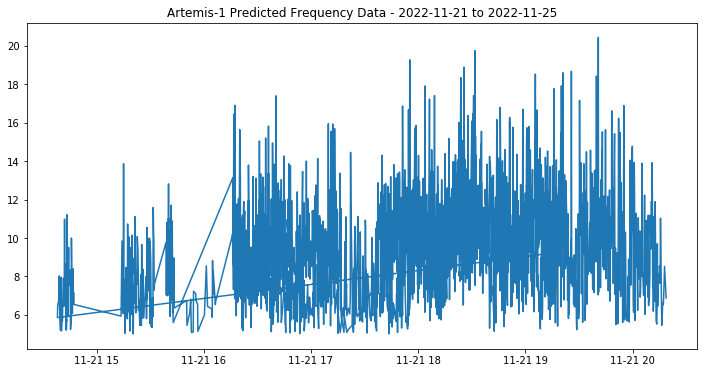

In [6]:
plt.plot(t_data.datetime,amp_data,markersize=1, alpha=1, label = 'VE7TIL data')
plt.title('Artemis-1 Predicted Frequency Data - %s to %s'%(t_gmd.datetime[0].strftime('%Y-%m-%d'), t_gmd.datetime[len(t_gmd)-1].strftime('%Y-%m-%d')))
plt.show();

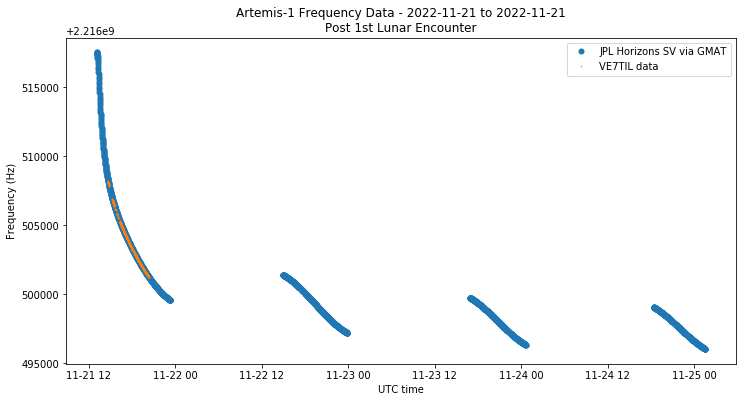

In [7]:
plt.plot(t_gmd.datetime, f_gmat, '.',markersize=10,alpha=1,label = 'JPL Horizons SV via GMAT')
plt.plot(t_data.datetime,freq_data,'.' ,markersize=1, alpha=2, label = 'VE7TIL data')
plt.title('Artemis-1 Frequency Data - %s to %s\nPost 1st Lunar Encounter'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.show();

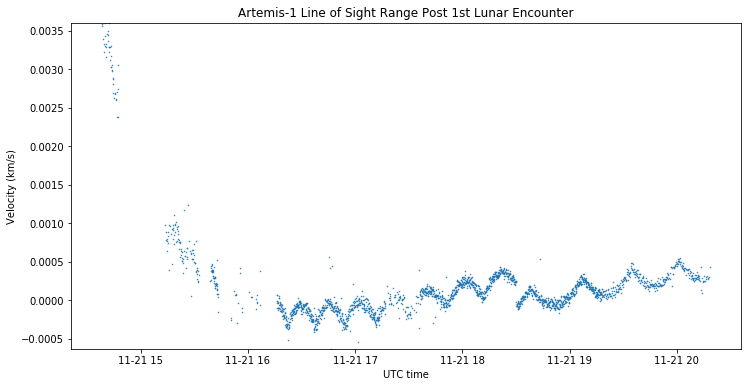

In [8]:
plt.ylim(np.min(np_rrdiff), np.max(np_rrdiff))
plt.plot(t_data.datetime, Rr - rangerate_interp,'.',markersize=1,  label = 'strf file')
plt.title('Artemis-1 Line of Sight Range Post 1st Lunar Encounter')
plt.ylabel('Velocity (km/s)')
plt.xlabel('UTC time')
plt.show();



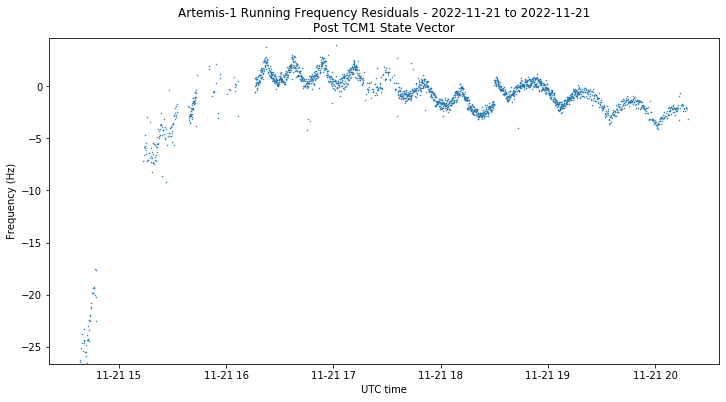

In [9]:
plt.ylim(np.min(freq_data - freq_gmat),np.max(freq_data - freq_gmat))
plt.plot(t_data.datetime, freq_data - freq_gmat,'.',markersize=1,  label = 'strf file')
plt.title('Artemis-1 Running Frequency Residuals - %s to %s\nPost TCM1 State Vector'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.show();